<font size=6><b>Lec12. matplotlib

* https://matplotlib.org/
* pip install matplotlib
* 시각화

In [ ]:
# ! pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 기본예

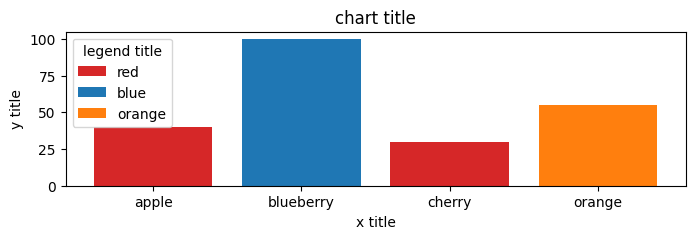

In [2]:

fig, ax = plt.subplots( figsize=(8, 2) )

x = ['apple', 'blueberry', 'cherry', 'orange']
y = [40, 100, 30, 55]
x_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(x, y, label=x_labels, color=bar_colors)

ax.set_ylabel('y title')
ax.set_xlabel('x title')
ax.set_title('chart title')
ax.legend(title='legend title')

plt.show()

In [3]:
train = pd.read_csv("./TITANIC/train.csv")
train.columns = train.columns.str.lower()

In [4]:
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

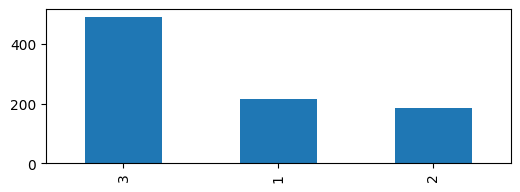

In [5]:
train['pclass'].value_counts().plot(kind='bar', figsize=(6,2))
plt.show()

In [6]:
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [7]:
train['pclass'].value_counts().index.values.tolist()

[3, 1, 2]

In [8]:
train['pclass'].value_counts().values.tolist()

[491, 216, 184]

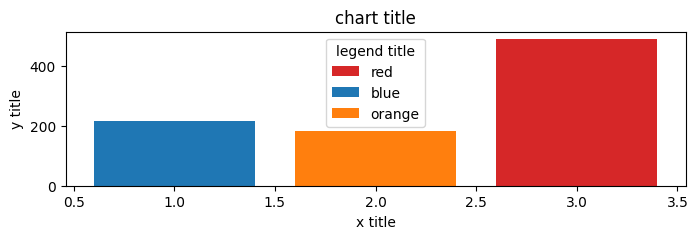

In [9]:

fig, ax = plt.subplots( figsize=(8, 2) )

x = train['pclass'].value_counts().index.values.tolist()
y = train['pclass'].value_counts().values.tolist()
x_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=x_labels, color=bar_colors)

ax.set_ylabel('y title')
ax.set_xlabel('x title')
ax.set_title('chart title')
ax.legend(title='legend title')

plt.show()

# plot()
* DataFrame.plot() vs. matplotlib.pyplot.plot()

<pre>

<font color=red><b>df.plot("subject"     , "score",  kind='bar', figsize=(2,2) )

<font color=red><b>plt.figure(figsize=(2,2))
plt.bar(df['subject'] , df['score']  )

In [22]:
df = pd.DataFrame({"subject":["kor",'eng','math'],
                   "score":[77,99,44],
                   "code":[100,200,300]
                  }) 
df.head()

,subject,score,code
0,kor,77,100
1,eng,99,200
2,math,44,300


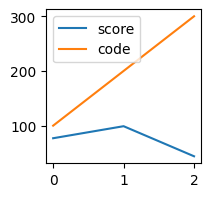

In [30]:
df.plot(figsize=(2,2))
plt.show()

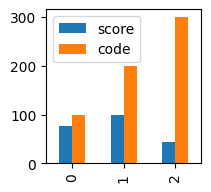

In [31]:
df.plot(kind="bar", figsize=(2,2))
plt.show()

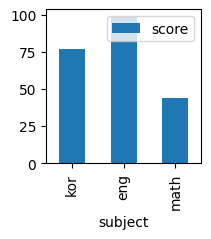

In [32]:
df.plot("subject","score",  kind='bar',  figsize=(2,2))
plt.show()

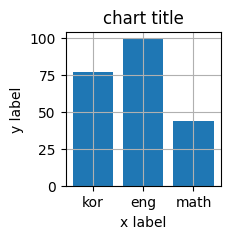

In [41]:
# df.plot("subject"     , "score",      kind='bar')
# plt.bar(df['subject'] , df['score']             )
plt.figure(figsize=(2,2))
plt.bar(df['subject'], df['score'])

#-----------------------------
plt.title("chart title")
plt.xlabel("x label")
plt.ylabel("y label")
plt.grid()
#-----------------------------
plt.show()

# subplot() vs subplots()
* plt.subplot(row, col, idx)
* plt.subplots(nrows,  ncols)

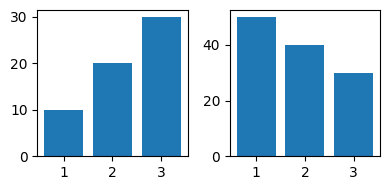

In [46]:
plt.figure(figsize=(4,2))

plt.subplot(1,2,  1)  #1행2열  1번째
plt.bar([1,2,3],[10,20,30])

plt.subplot(1,2,  2)  #1행2열  2번째
plt.bar([1,2,3],[50,40,30])

plt.tight_layout()
plt.show()

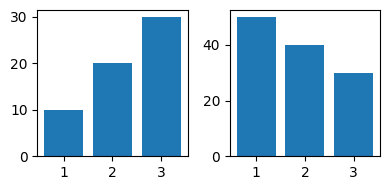

In [53]:
fig, axes  = plt.subplots(nrows=1, ncols=2,   figsize=(4, 2)) #1행2열

axes[0].bar([1,2,3],[10,20,30])
axes[1].bar([1,2,3],[50,40,30])

plt.tight_layout()
plt.show()

# y축 이중 차트
* fig, ax1 = plt.subplots()
* ax2 = ax1.twinx()

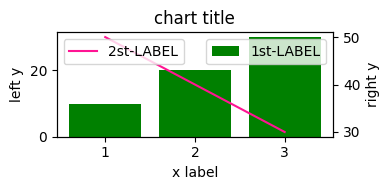

In [70]:
plt.rcParams['figure.figsize'] = (4, 2)  #일괄적용

fig, ax1 = plt.subplots()
ax1.bar([1,2,3], [10,20,30], color='green' , label='1st-LABEL')
ax1.set_ylabel("left y")
ax1.set_xlabel("x label")
ax1.legend(loc="upper right")

ax2 = ax1.twinx()
ax2.plot([1,2,3], [50,40,30], color='deeppink' , label='2st-LABEL')
ax2.set_ylabel("right y")
# ax2.set_xlabel("x label")
ax2.legend(loc="upper left")

plt.title("chart title")
plt.tight_layout()
plt.show()

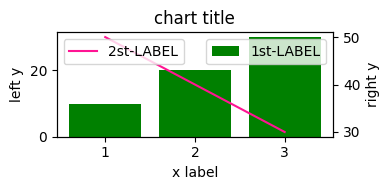

In [70]:
plt.rcParams['figure.figsize'] = (4, 2)  #일괄적용


fig, ax1 = plt.subplots()
ax1.bar([1,2,3], [10,20,30], color='green' , label='1st-LABEL')
ax1.set_ylabel("left y")
ax1.set_xlabel("x label")
ax1.legend(loc="upper right")

ax2 = ax1.twinx()
ax2.plot([1,2,3], [50,40,30], color='deeppink' , label='2st-LABEL')
ax2.set_ylabel("right y")
# ax2.set_xlabel("x label")
ax2.legend(loc="upper left")

plt.title("chart title")
plt.tight_layout()
plt.show()

# df.quantile() vs. np.percentile()
* df.quantile(q=0.25) vs. np.percentile(df[컬럼], q=25) 
    * Series리턴  vs. 값리턴
* df['컬럼'].quantile(q=0.25)   == np.percentile(df[컬럼], q=25) 

In [112]:
df.quantile(q=0.25)

score    11.75
Name: 0.25, dtype: float64

In [114]:
df.quantile(q=0.25).values[0]

11.75

## 4분위 이상치(Outlier) 탐지

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FboDTe4%2FbtqHP3beJxg%2F8mzOK0wWK31QXpaY7VDJRk%2Fimg.png">

In [116]:
df = pd.DataFrame(data=[1,4,    11,12,15,14,15,14,19,11,12,15,14,     77,70,80],
                  columns=['score']
                 )
print(df.head())

q1 = df["score"].quantile(q=0.25)  # 25%
q2 = df["score"].quantile(q=0.5)   # 중앙값
q3 = df["score"].quantile(q=0.75)  # 75%
IQR = q3 - q1
print (q1, q2, q3, IQR )  # 11.75   14.0    16.0    4.25

v_min = q1 - (IQR*1.5)
v_max = q3 + (IQR*1.5)
print (v_min,  v_max)     # 5.375   22.375

   score
0      1
1      4
2     11
3     12
4     15
11.75 14.0 16.0 4.25
5.375 22.375


In [110]:
df = pd.DataFrame(data=[1,4,    11,12,15,14,15,14,19,11,12,15,14,     77,70,80],
                  columns=['score']
                 )
print(df.head())


# q1 = df.quantile(q=0.25).values[0]  # 25%
q1 = np.percentile(df["score"], q=25)  # 25%
q2 = np.percentile(df["score"], q=50)  # 중앙값
q3 = np.percentile(df["score"], q=75)  # 75%
IQR = q3 - q1
print (q1, q2, q3, IQR )  # 11.75   14.0    16.0    4.25

v_min = q1 - (IQR*1.5)
v_max = q3 + (IQR*1.5)
print (v_min,  v_max)     # 5.375   22.375

   score
0      1
1      4
2     11
3     12
4     15
11.75 14.0 16.0 4.25
5.375 22.375


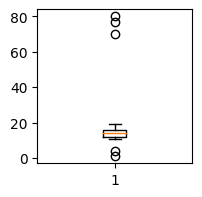

In [107]:
plt.boxplot(df['score'])
# plt.figure(figsize=(2,8))
plt.show()

* 이상치(Outlier)

In [106]:
df[ (df['score']<v_min) | (df['score']>v_max) ]

,score
0,1
1,4
13,77
14,70
15,80


# boxplot

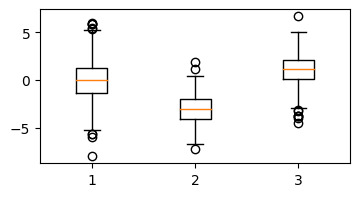

In [71]:
# 2. 데이터 준비
np.random.seed(15415454)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

plt.boxplot([data_a, data_b, data_c])
plt.show()

# violinplot

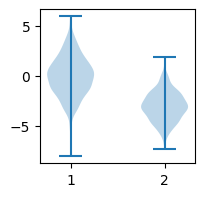

In [120]:
# 2. 데이터 준비
np.random.seed(15415454)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)

plt.violinplot([data_a, data_b])
plt.show()

# scatter

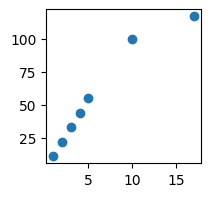

In [126]:
# 2. 데이터 준비
np.random.seed(15415454)
data_x = [1,2,3,4,5,10,17]
data_y = [11,22,33,44,55,100,117]

plt.scatter(data_x, data_y)
plt.show()

# heatmap
* plt.pcolor(df)  ---- 비추
* sns.heatmap(df)

In [128]:
# ! pip install seaborn

In [129]:
import seaborn as sns

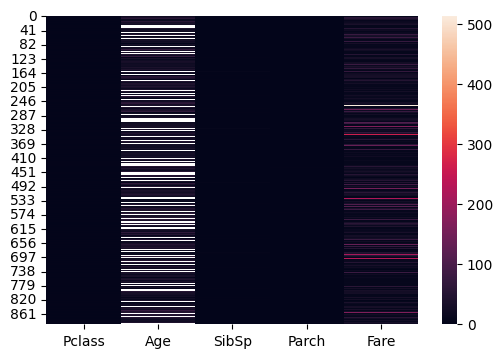

In [139]:
plt.rcParams['figure.figsize'] = (6, 4)  #일괄적용

df = pd.read_csv("./TITANIC/train.csv")
df = df[[ 'Pclass','Age', 'SibSp','Parch', 'Fare']]
sns.heatmap(df)
# plt.figure(figsize=(6,4))
plt.show()

# hist
* 히스토그램: 누적분포도
* <font size=4 color=red><b>df.hist() #꿈의속도

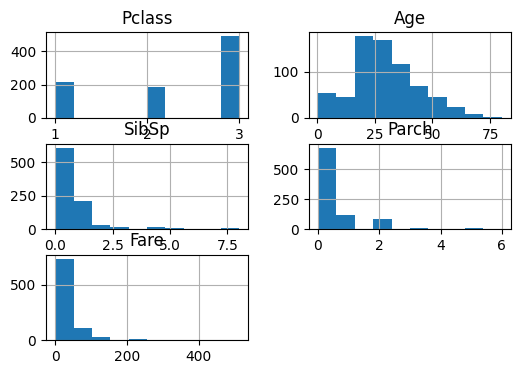

In [141]:
df.hist()
plt.show()